In [1]:
from src.tools import Observation
import os
import pandas as pd
import numpy as np
from astropy.time import Time
import astropy.units as u

c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:181: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_t90 = pd.DataFrame(c_event,index=utc_event,columns=['c_event']).resample('1s',loffset=pd.Timedelta(value=self.exp_time/2,unit='second')).ffill()
c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:181: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_t90 = pd.DataFrame(c_event,index=utc_event,columns=['c_event']).resample('1s',loffset=pd.Timedelta(value=self.exp_time/2,unit='second')).ffill()


index_t90_start = 2022-09-27 05:36:24, index_t90_end = 2022-09-27 05:36:32
13 21
statistics in 70-370 keV for a GRB_Fermi at 2022-09-27 05:36:20.950000:
peak time [utc]: 2022-09-27 05:36:25.246373
SNR at peak: 27.692115531916937
count rate [cnt/s] above background at peak: 386.45138490861126
T90 [s]: 8
SNR in T90: c_event    33.382657
dtype: float64
counts above background in T90: c_event    2709.964542
dtype: float64

index_t90_start = 2022-09-27 05:36:24, index_t90_end = 2022-09-27 05:36:33
13 22
statistics in 70-890 keV for a GRB_Fermi at 2022-09-27 05:36:20.950000:
peak time [utc]: 2022-09-27 05:36:25.246373
SNR at peak: 26.096876489808842
count rate [cnt/s] above background at peak: 379.3035339055864
T90 [s]: 9
SNR in T90: c_event    31.378415
dtype: float64
counts above background in T90: c_event    2779.780468
dtype: float64



c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:265: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


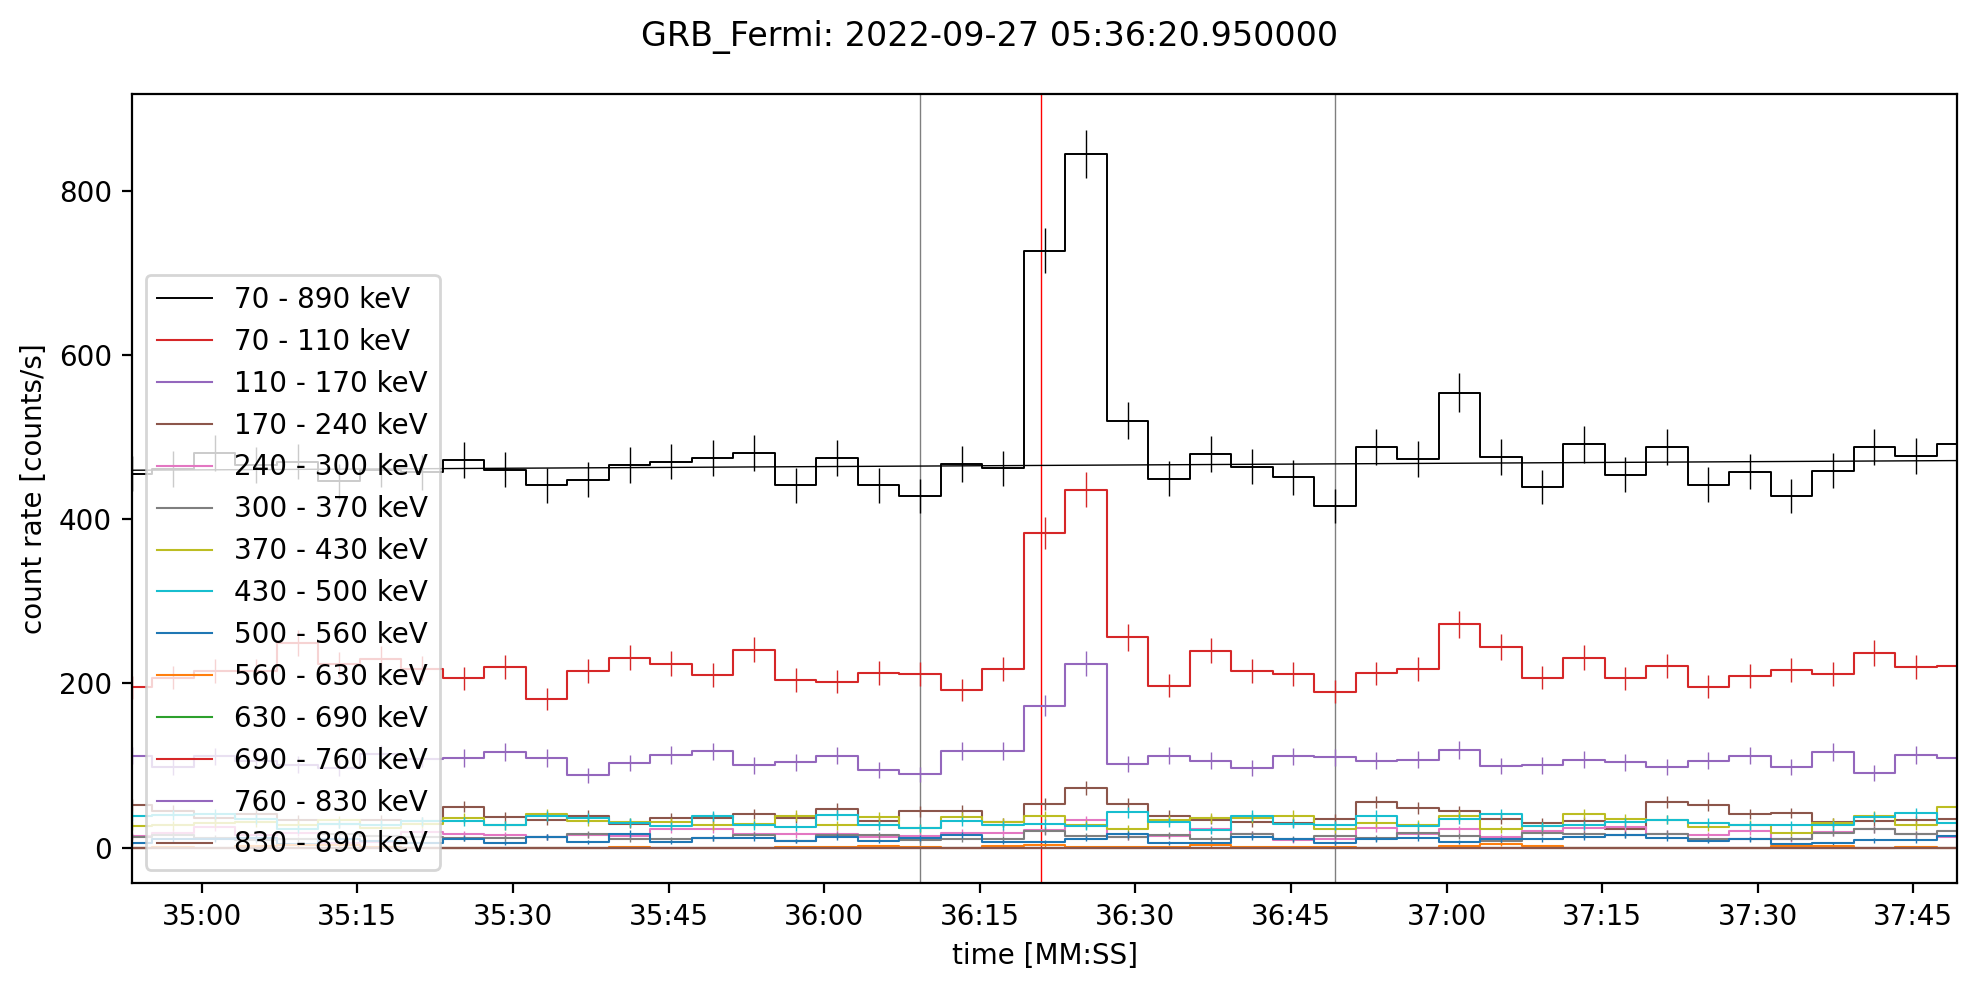

In [6]:
df = pd.read_csv(r"C:\Users\maria\Desktop\CubeSats\trigger_file_list.csv")
path = r"C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\files\\"
n = 4
time,mission,filename,ra,dec = df.time[n],df.mission[n],df.filename[n],df.ra[n],df.dec[n]
obs = Observation(path+filename)
obs.check_event(time,'GRB_'+mission,llim=3,rlim=7,dtvalue=1.5,fit_function='linear')
# obs.plot_skymap(time,'GRB_'+mission,ra,dec)

In [15]:
s = pd.to_datetime(time) - pd.Timedelta('1min')
e = pd.to_datetime(time) + pd.Timedelta('1min')
obs.data[np.logical_and(obs.time_utc.index>s,obs.time_utc.index<e)]

,0,1,2,3,4,5,6,7
utc,,,,,,,,
2022-08-26 10:20:20.400,0,176,142,60,202,72,3,0
2022-08-26 10:20:23.400,0,201,160,50,232,100,3,0
2022-08-26 10:20:26.400,0,170,122,53,192,81,2,0
2022-08-26 10:20:29.400,0,181,124,50,205,72,1,0
2022-08-26 10:20:32.400,0,183,115,39,202,84,2,0
2022-08-26 10:20:35.400,0,180,112,53,221,66,1,0
2022-08-26 10:20:38.400,0,177,131,50,206,85,1,0
2022-08-26 10:20:41.400,0,172,134,46,220,85,2,0
2022-08-26 10:20:44.400,0,172,135,43,205,113,0,0


In [18]:
s = pd.to_datetime(time) - pd.Timedelta('1min')
e = pd.to_datetime(time) + pd.Timedelta('1min')
obs.data[np.logical_and(obs.time_utc.index>s,obs.time_utc.index<e)].resample('1000ms').bfill()

,0,1,2,3,4,5,6,7
utc,,,,,,,,
2022-08-26 10:20:20,0,176,142,60,202,72,3,0
2022-08-26 10:20:21,0,201,160,50,232,100,3,0
2022-08-26 10:20:22,0,201,160,50,232,100,3,0
2022-08-26 10:20:23,0,201,160,50,232,100,3,0
2022-08-26 10:20:24,0,170,122,53,192,81,2,0
...,...,...,...,...,...,...,...,...
2022-08-26 10:22:13,0,184,138,57,212,63,0,0
2022-08-26 10:22:14,0,184,138,57,212,63,0,0
2022-08-26 10:22:15,0,178,133,45,195,97,1,0


In [ ]:
for file in os.listdir(r"C:\Users\maria\Desktop\CubeSats\GRBs\files"):
    if file == 'test.json':
        continue
    else:
        obs = Observation(r"C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\files\\"+file)
        # grb = obs.is_GRB_in_file()
        # print(f"{file}:\n GRBs: {grb}")
        sgr = obs.is_SGR_in_file()
        sf = obs.is_SF_in_file()
        print(f"{file}:\n SGR:\n {sgr} \n SF:\n {sf}")

In [24]:
o=obs.data.resample('1s',origin='start',loffset=pd.Timedelta(-1*obs.exp_time/2,unit='s')).ffill()/obs.exp_time

C:\Users\maria\AppData\Local\Temp\ipykernel_784\3009057076.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  o=obs.data.resample('1s',origin='start',loffset=pd.Timedelta(-1*obs.exp_time/2,unit='s')).ffill()/obs.exp_time


In [20]:
obs.data.index[0]+pd.Timedelta(-1*obs.exp_time/2,unit='s')

Timestamp('2022-08-25 21:51:00.900000')

In [35]:
print(obs.data[:10])

                         0    1    2   3    4   5  6  7
utc                                                    
2022-08-25 21:51:02.400  0  153  106  21  135  45  0  0
2022-08-25 21:51:05.400  0  153  112  38  132  34  1  0
2022-08-25 21:51:08.400  0  173  106  34  135  34  1  0
2022-08-25 21:51:11.400  0  150   97  27  119  27  0  0
2022-08-25 21:51:14.400  0  201  105  32  136  32  0  0
2022-08-25 21:51:17.400  0  184  118  28  119  32  0  0
2022-08-25 21:51:20.400  0  178   96  26  127  31  0  0
2022-08-25 21:51:23.400  0  163   98  31  113  30  0  0
2022-08-25 21:51:26.400  0  167   99  37  115  30  0  0
2022-08-25 21:51:29.400  0  144  130  28   99  32  0  0


statistics in 70-370 keV for a GRB_GECAM at 2023-01-06 19:33:20:
peak time [utc]: 2023-01-06 19:32:46.111062
SNR at peak: 0.5825749333420617
count rate [cnt/s] above background at peak: 6.793932822920539
T90 [s]: 1
SNR in T90: 0.17444774941703145
counts above background in T90: 2.7966101694915437

statistics in 70-890 keV for a GRB_GECAM at 2023-01-06 19:33:20:
peak time [utc]: 2023-01-06 19:32:32.111062
SNR at peak: -0.6711080527233242
count rate [cnt/s] above background at peak: -9.028835436303325
T90 [s]: 1
SNR in T90: -0.899786464744876
counts above background in T90: -16.542372881865276



c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:252: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


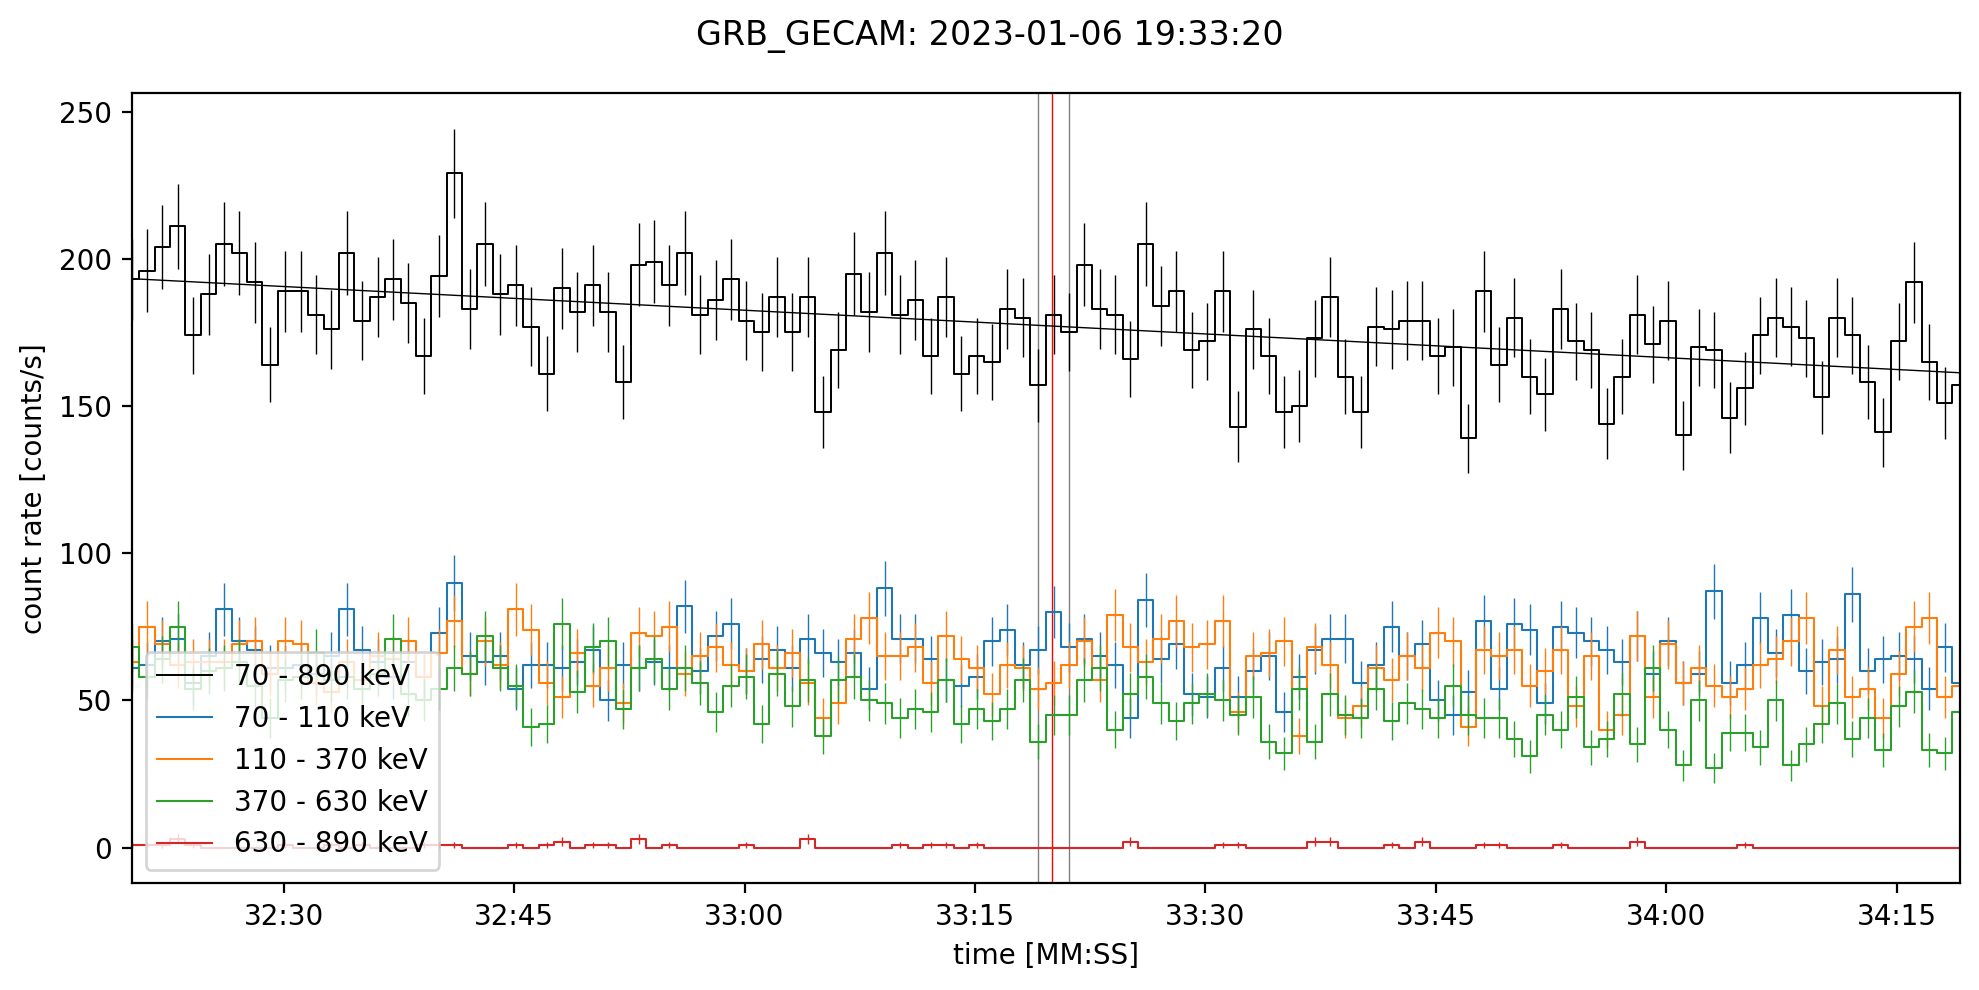

In [2]:
path = r"C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\files\\r23a06b_178176.json"
time = '2023-01-06 19:33:20'
mission = 'GECAM'
obs = Observation(path)
obs.check_event(time,'GRB_'+mission,llim=1,rlim=1,dtvalue=1,fit_function='linear')
ra = 73.833	
dec = 30.217
# obs.plot_skymap(time,'GRB_'+mission,ra,dec)

In [3]:
pd.Timestamp('2022-12-01 10:00:00') - pd.Timestamp('2022-12-01 09:00:00')

Timedelta('0 days 01:00:00')